In [1]:
from IPython.display import Image, display
from glob import glob
import pdb
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

In [2]:
def display_fldr(fldr):
    imgs = glob(os.path.join(fldr, 'meta_people', '*', '*.png' ))
    if len(imgs) == 0:
        return
    print('Folder Name : ', fldr)
    for idx, img in enumerate(imgs):
        display(Image(filename=img, width=800, height=800))
        
        stats = pkl.load(open('{}/meta_people/{}/dp_stats.pkl'.format(fldr, str(idx)), 'rb'))
        fig, ax = plt.subplots(1, figsize=(10, 5))
        all_data = np.stack([np.array(v) for k, v in stats.items()], axis=0)
        argmax = np.argmax(all_data, axis=0)
        smooth_factor = 30
        for i, (k, v) in enumerate(stats.items()):
            v = v[:((len(v) // smooth_factor) * smooth_factor)]
            v = np.reshape(np.array(v), (-1, smooth_factor))
            v = v.mean(axis=-1)
            ax.plot(range(len(v)), v, label=k)
            ax.plot(range(len(v)), [0]*len(v))
        plt.legend()
        plt.show()
        plt.close()
        
        cut_off = (2 * len(argmax)) // 3
        second_half = np.bincount(argmax[cut_off:]) / (1.0 * sum(np.bincount(argmax[cut_off:])))
        first_half = np.bincount(argmax[:cut_off]) / (1.0 * sum(np.bincount(argmax[:cut_off])))
        print('First 2/3 Stats : ', first_half)
        print('Last 1/3 Stats : ', second_half)
    print('\n')
    print('-'*170)

Folder Name :  m4m_cache/cosine_test/softmax.nolrschedule


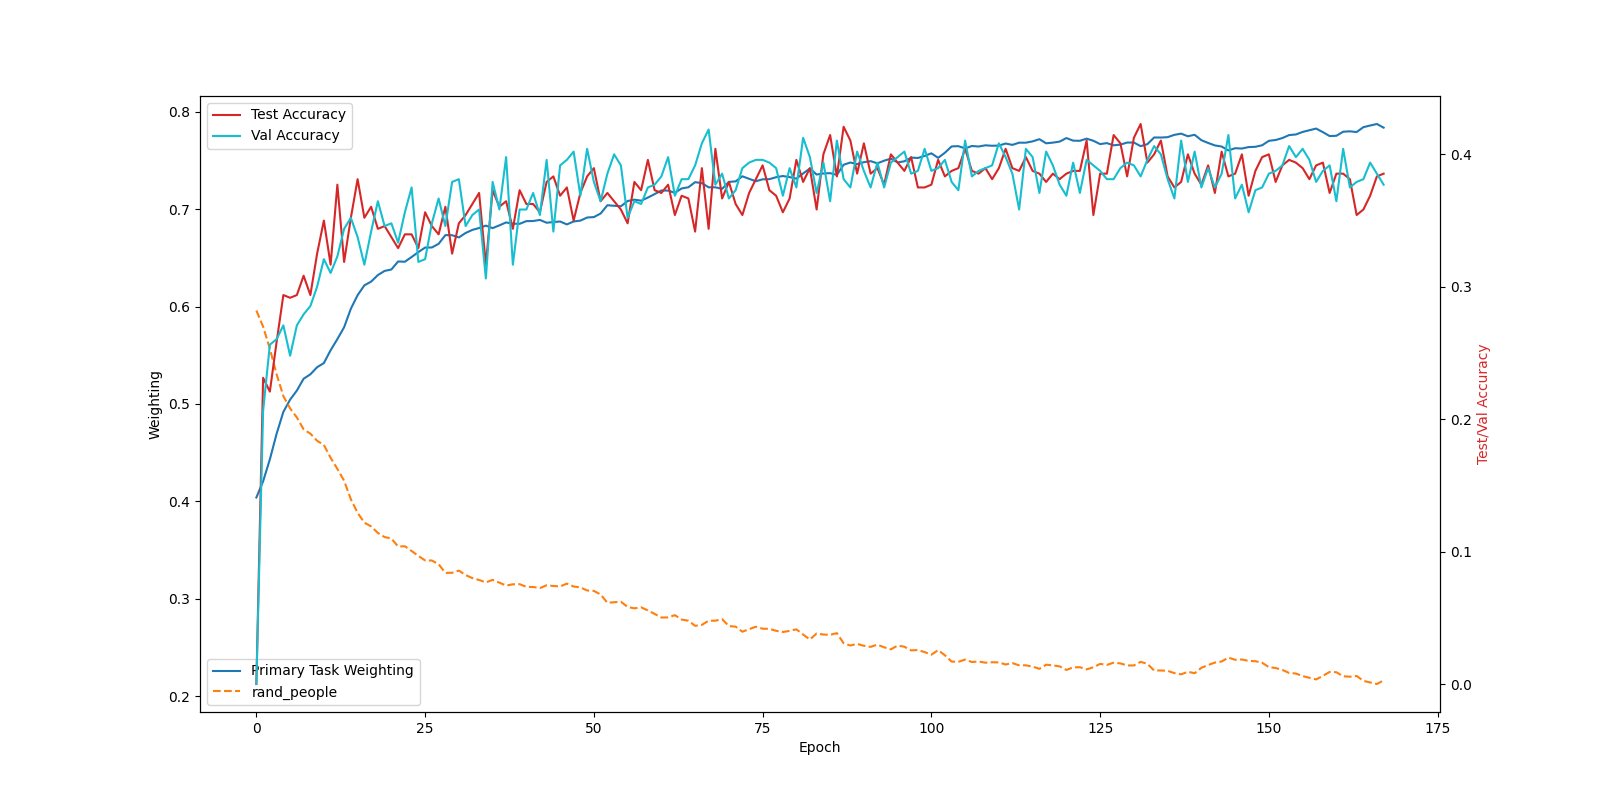

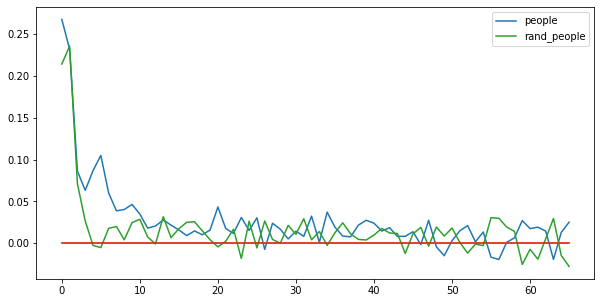

First 2/3 Stats :  [0.53817365 0.46182635]
Last 1/3 Stats :  [0.51047904 0.48952096]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test/softmax


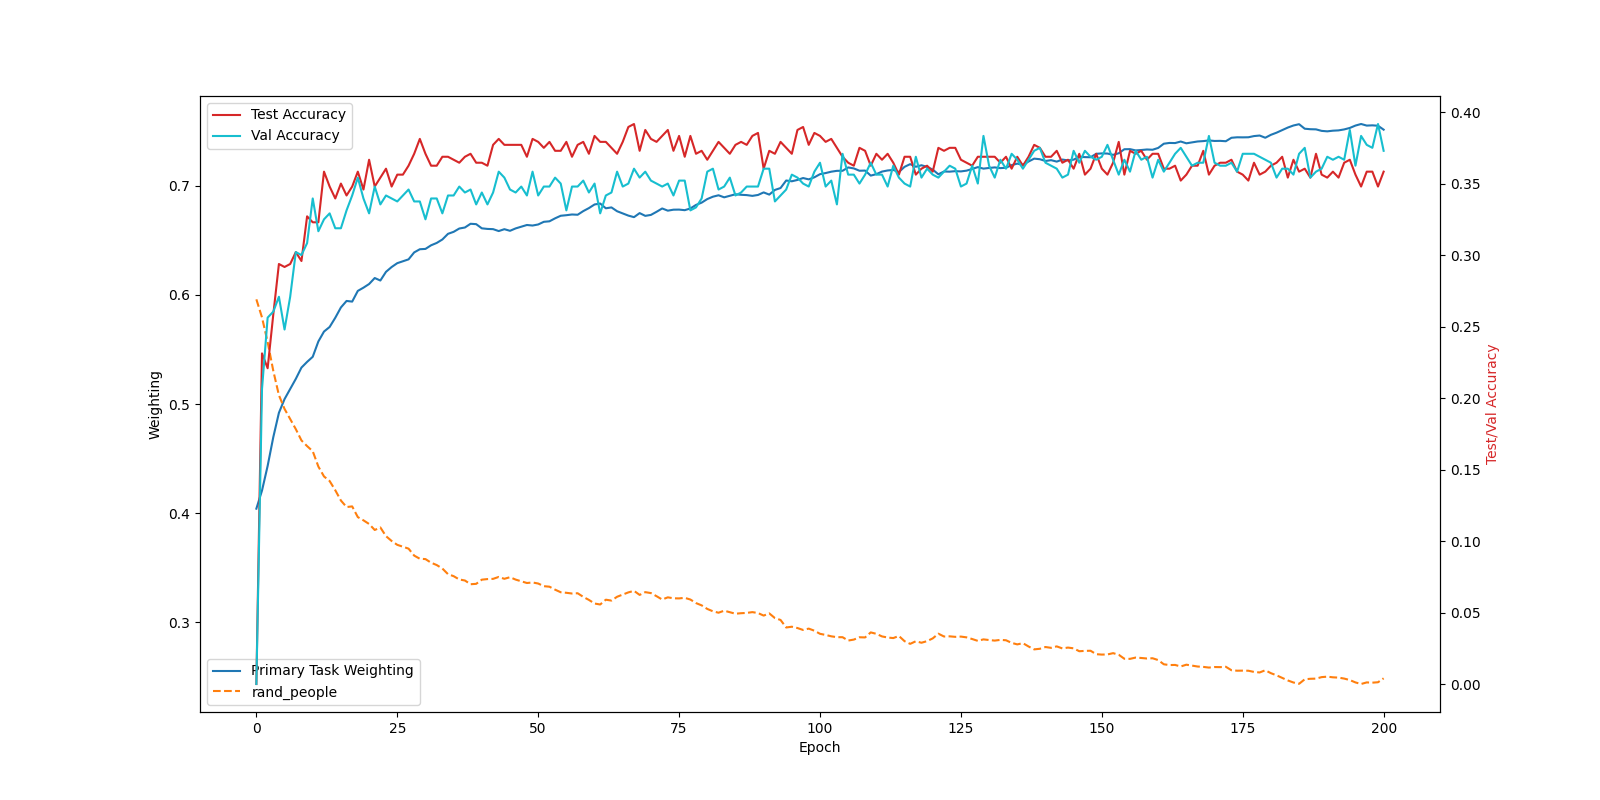

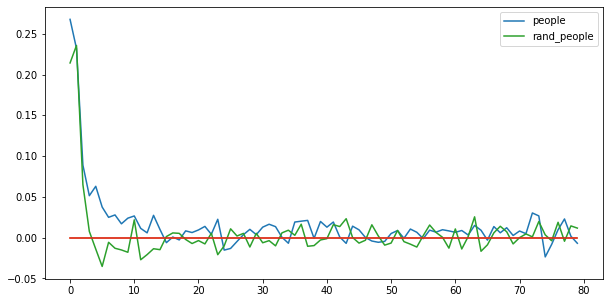

First 2/3 Stats :  [0.561875 0.438125]
Last 1/3 Stats :  [0.525 0.475]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test/softmax.2.aux.nolrschedule.wlr_1e-1.sgdlr_3e-4.lr_3e-4


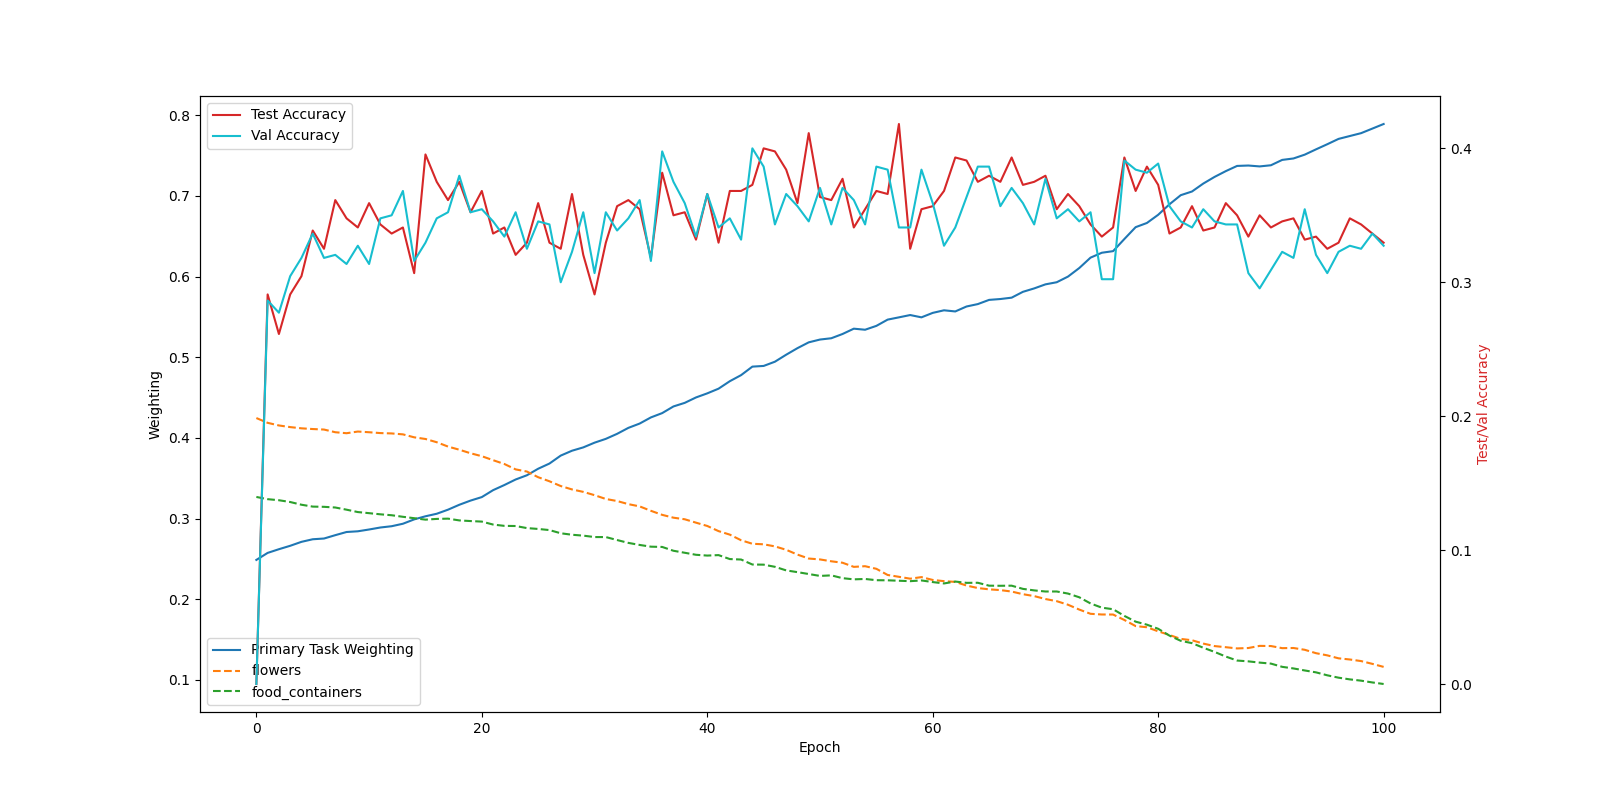

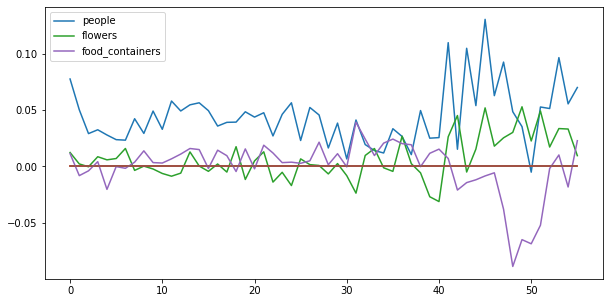

First 2/3 Stats :  [0.50926743 0.23477493 0.25595763]
Last 1/3 Stats :  [0.51322751 0.27513228 0.21164021]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test/softmax.nolrschedule.wlr_3e-1


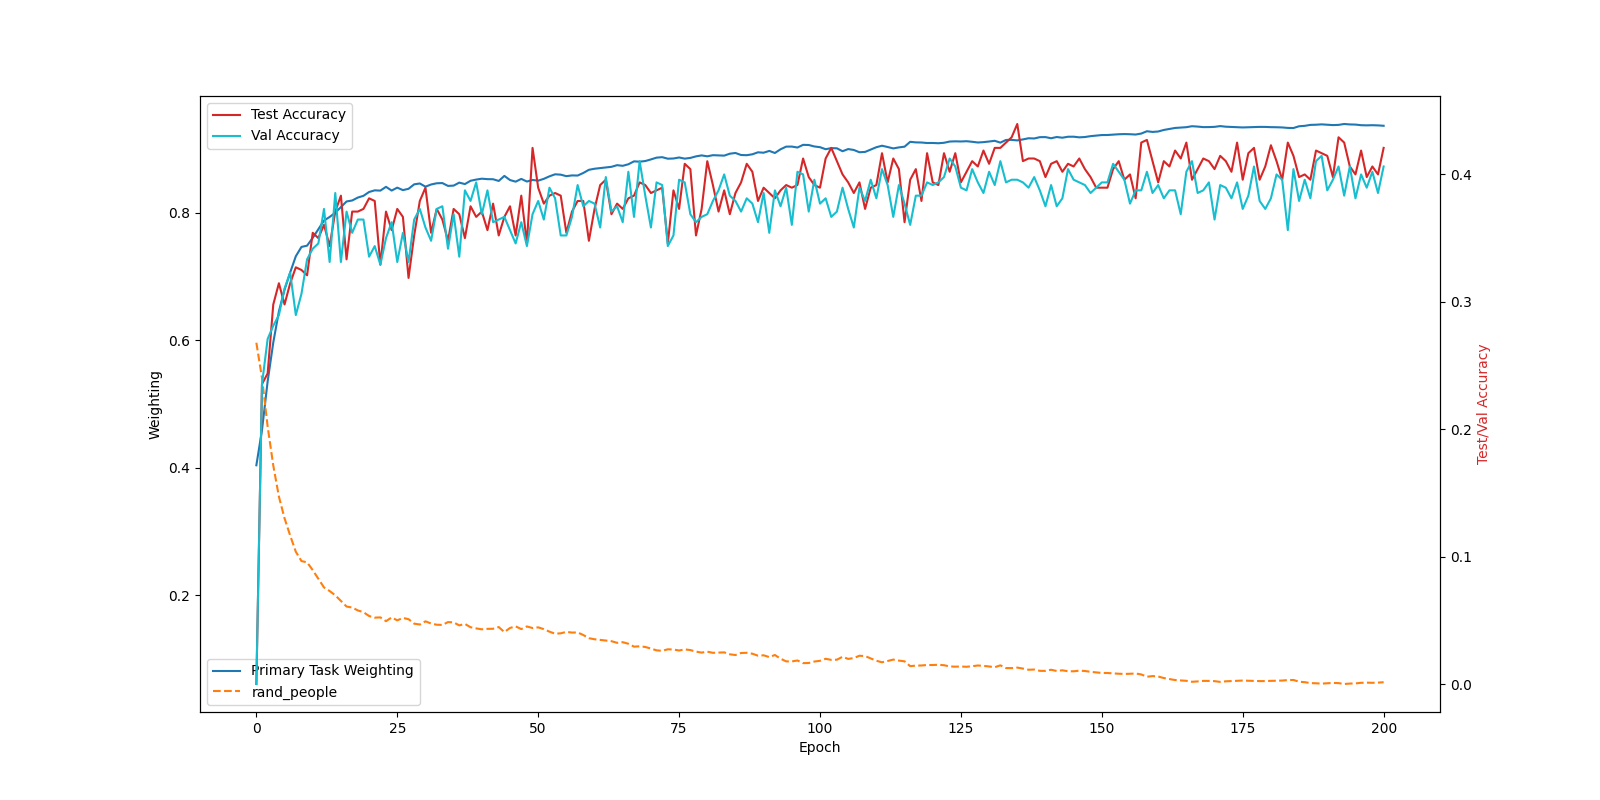

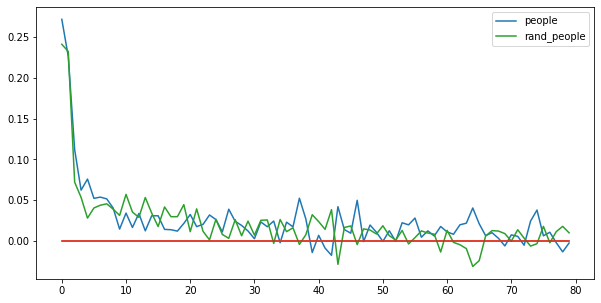

First 2/3 Stats :  [0.5075 0.4925]
Last 1/3 Stats :  [0.51875 0.48125]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test/softmax.2.aux.nolrschedule.wlr_3e-1.sgdlr_3e-4.lr_3e-4


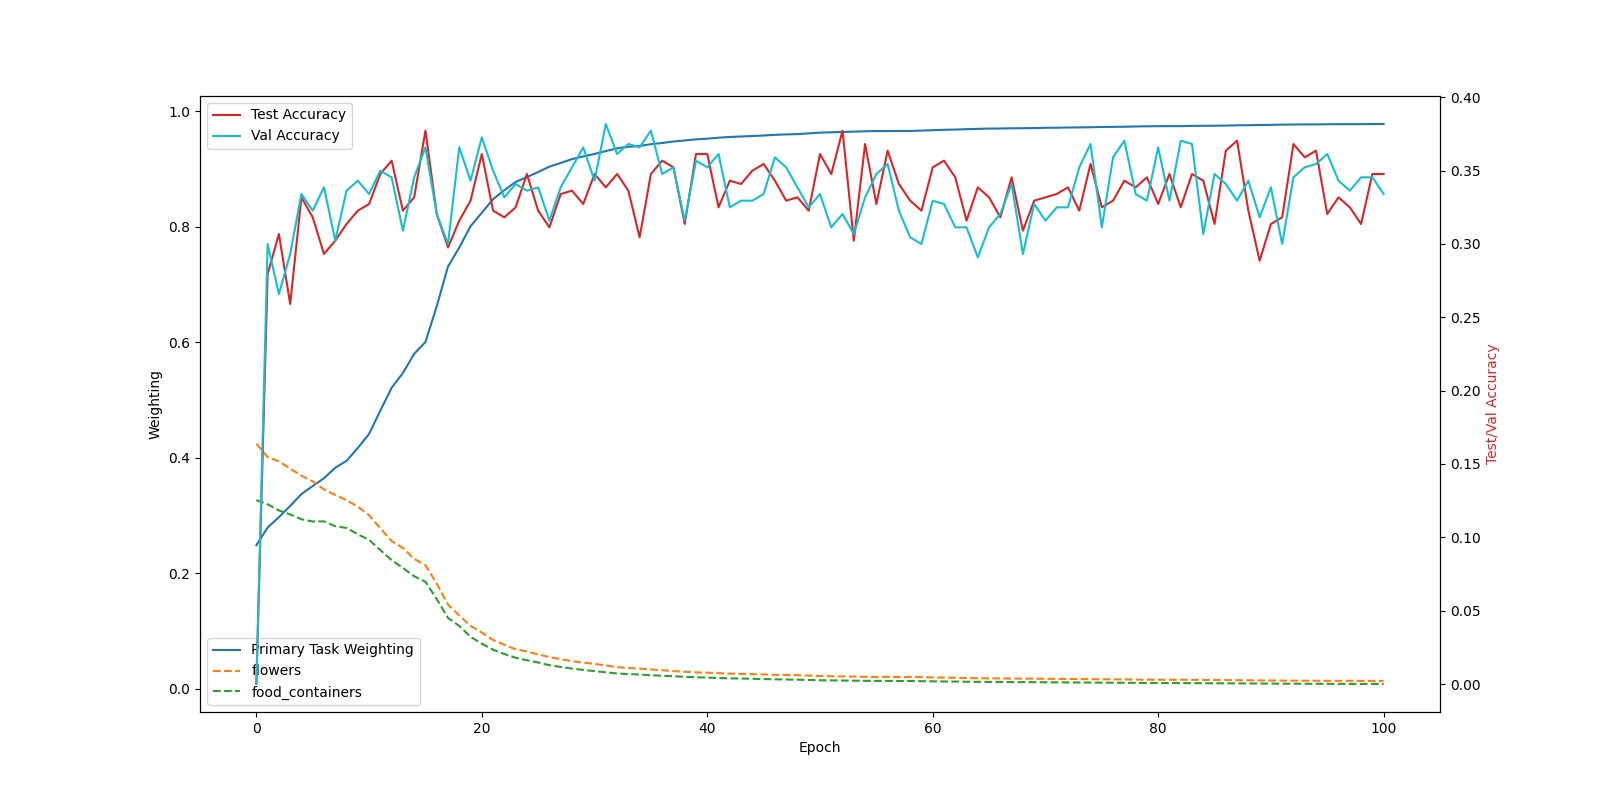

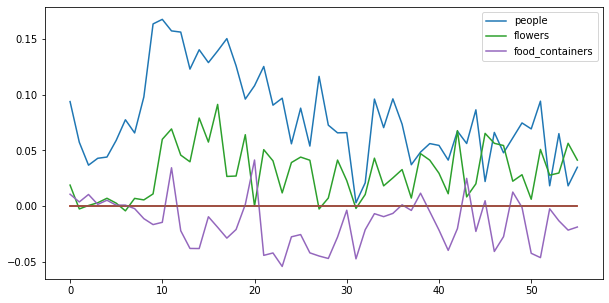

First 2/3 Stats :  [0.60723742 0.22241836 0.17034422]
Last 1/3 Stats :  [0.46737213 0.31922399 0.21340388]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [3]:
fldrs = glob('m4m_cache/cosine_test/softmax*')
for fldr in fldrs:
    display_fldr(fldr)

Folder Name :  m4m_cache/cosine_test/linear.2.aux.nolrschedule.wlr_3e-1.sgdlr_1e-4.lr_1e-4


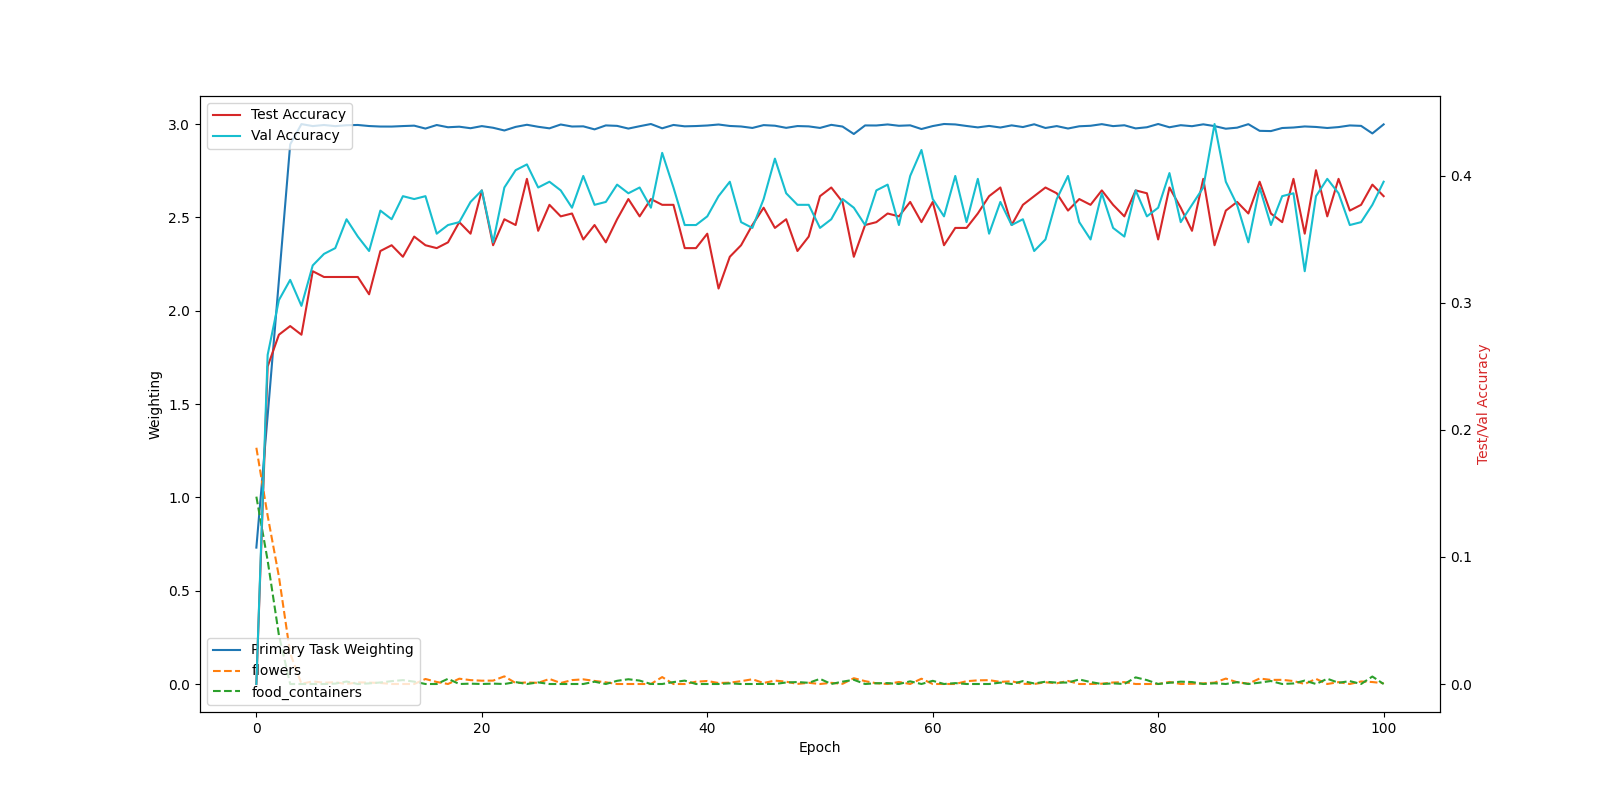

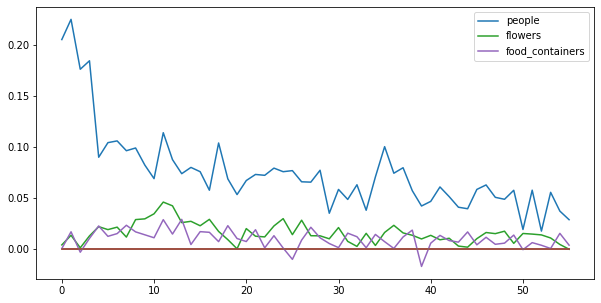

First 2/3 Stats :  [0.70785525 0.15092674 0.14121801]
Last 1/3 Stats :  [0.58730159 0.20811287 0.20458554]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test/linear.2.aux.nolrschedule.wlr_3e-1.sgdlr_1e-4.lr_1e-4.longer


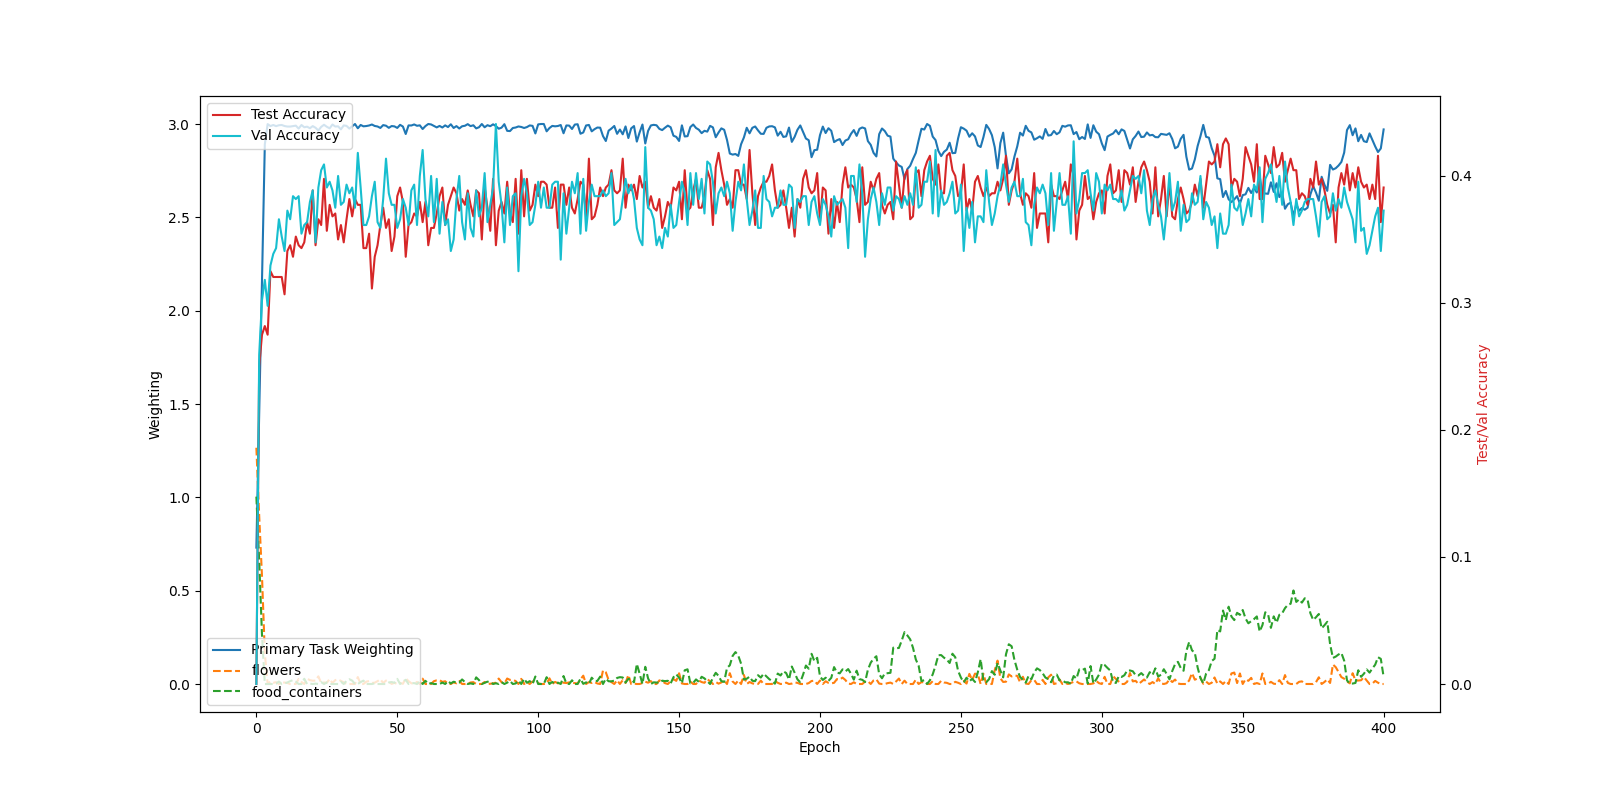

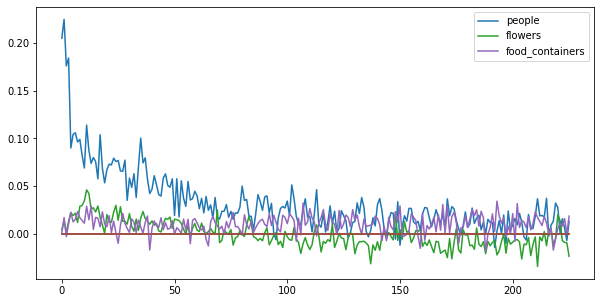

First 2/3 Stats :  [0.53143614 0.19589676 0.27266711]
Last 1/3 Stats :  [0.39611822 0.24790472 0.35597706]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test/linear.2.aux.nolrschedule.wlr_1e-2.sgdlr_1e-4.lr_1e-4


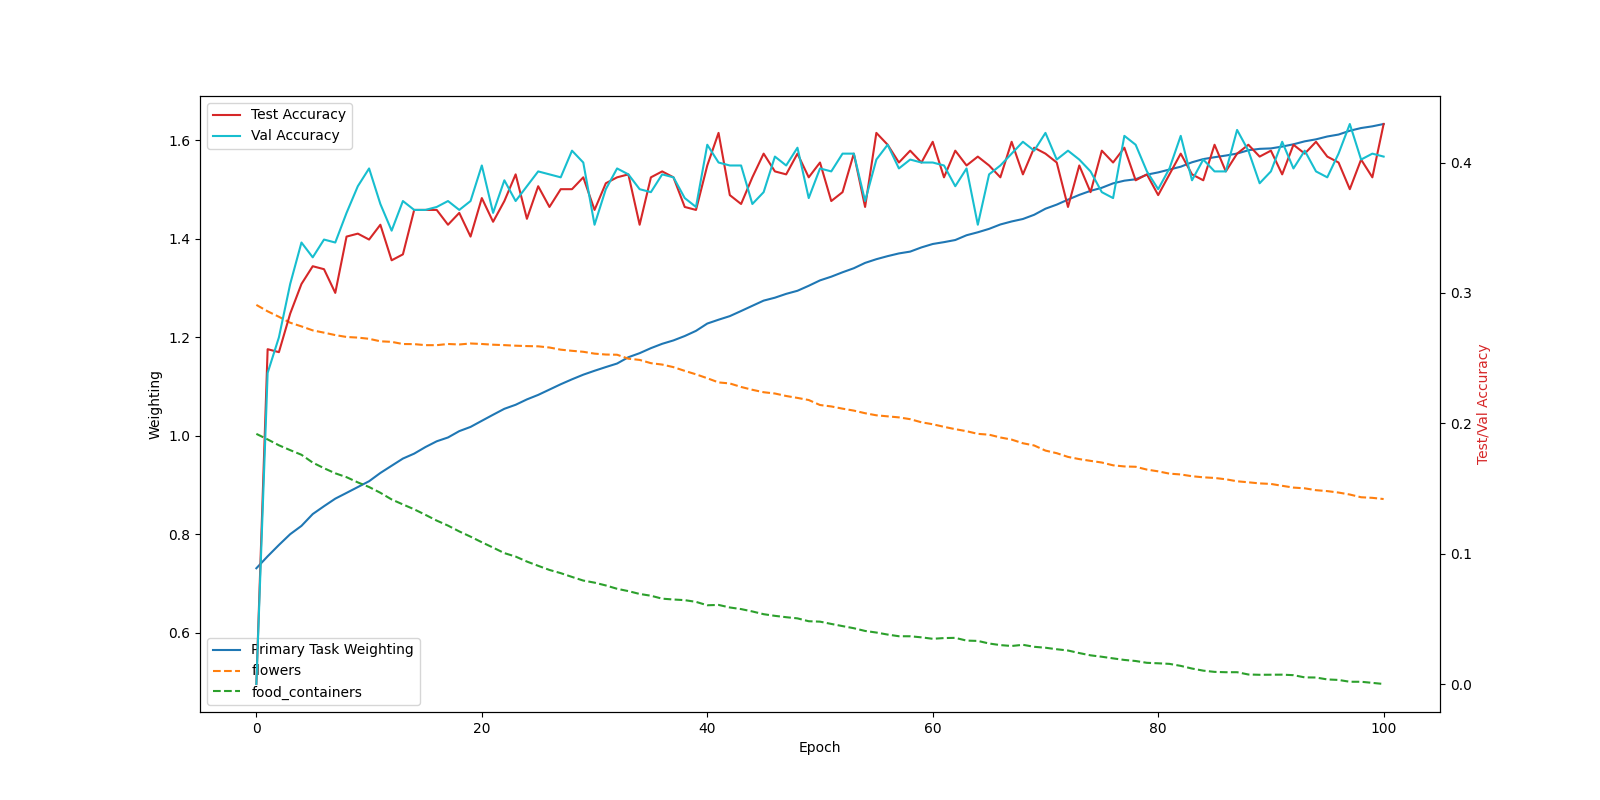

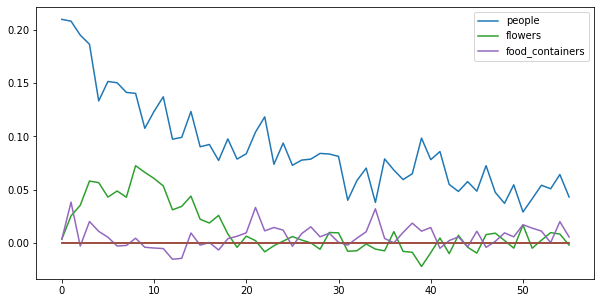

First 2/3 Stats :  [0.760812   0.13239188 0.10679612]
Last 1/3 Stats :  [0.62962963 0.14638448 0.22398589]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test.lossnormed-to-1.0/linear.2.aux.nolrschedule.wlr_3e-1.sgdlr_1e-4.lr_1e-4.longer


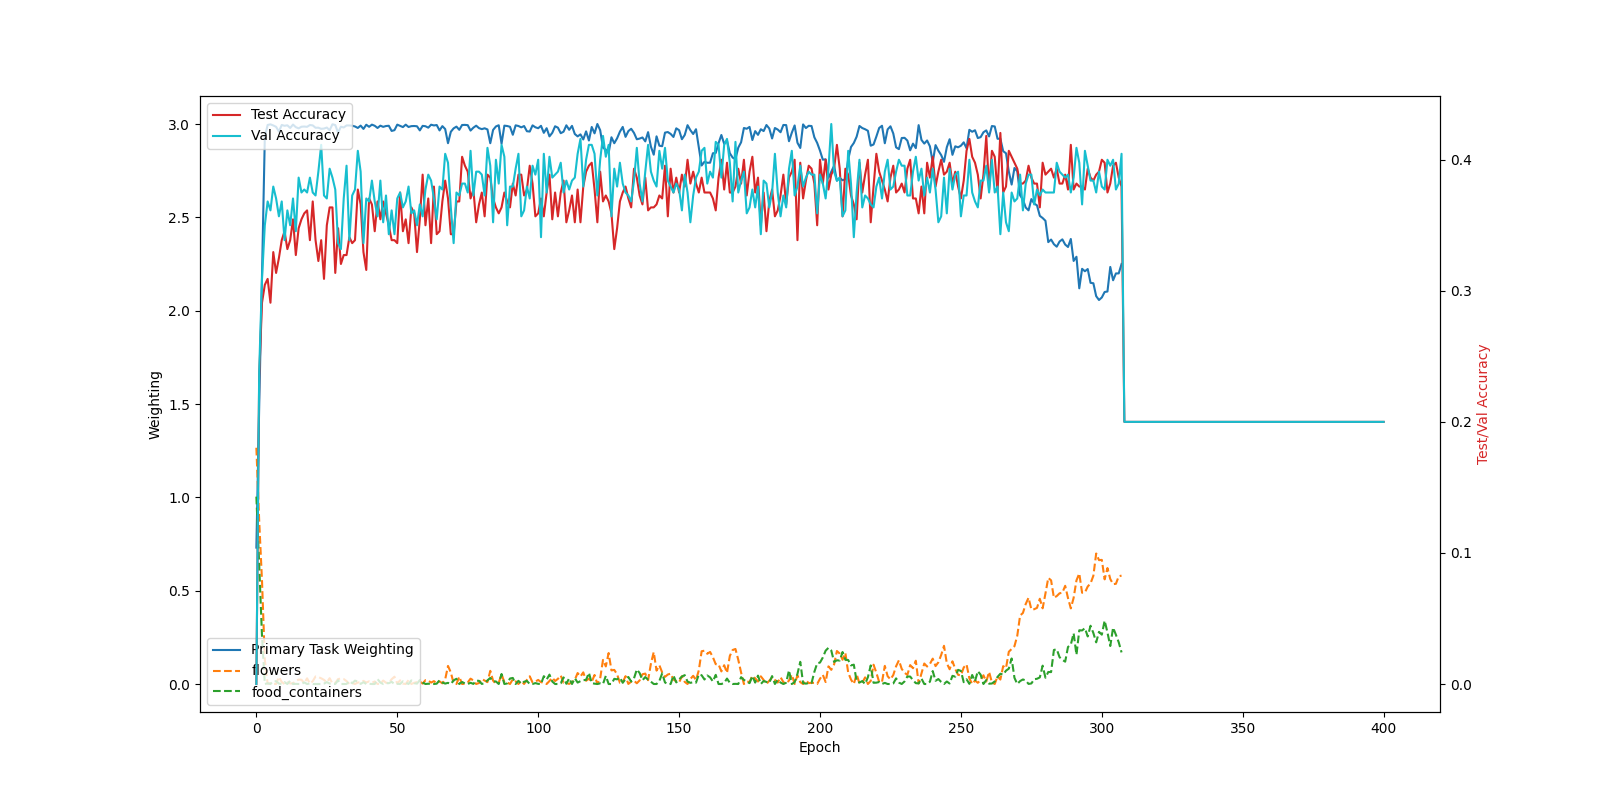

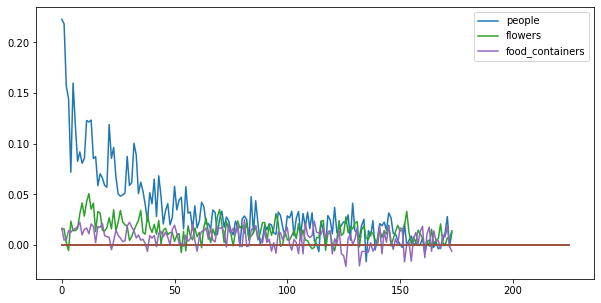

First 2/3 Stats :  [0.50871388 0.25965144 0.23163468]
Last 1/3 Stats :  [0.79797089 0.10145567 0.10057345]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [4]:
fldrs = glob('m4m_cache/cosine*/linear*')
for fldr in fldrs:
    display_fldr(fldr)